# DATA EXPLORATION AND PREPROCESSING (Part B)

## Question 1: Outliers removal and transformation


In [218]:
# importing packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns
from scipy import stats

In [219]:
# 1 - reading csv file and printing first 5 rows
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [220]:
# (a) finding the kurtosis and skewness values of the Insulin attribute? 
kurtosis = df["Insulin"].kurtosis()
skewness = df['Insulin'].skew()

print("The kurtosis for Insulin is", kurtosis)
print("The skewness for Insulin is", skewness)

The kurtosis for Insulin is 7.265911343503076
The skewness for Insulin is 2.268393486537506


In [221]:
# (b) filtering the dataframe and selecting only the rows where Insulin is not equal to 0 
df = df.loc[df["Insulin"] != 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205,33.2,0.591,25,0
781,1,140,74.0,26,180,24.1,0.828,23,0
782,1,144,82.0,46,180,46.1,0.335,46,1
785,2,121,70.0,32,95,39.1,0.886,23,0


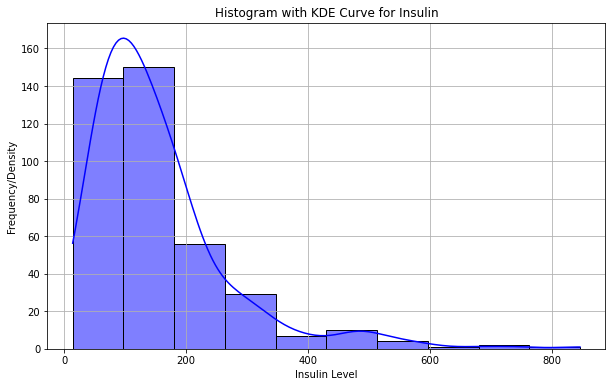

In [222]:
# (c) drawing histogram of Insulin column along with kernel density estimation (KDE) curb
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram with KDE curve
sns.histplot(df['Insulin'], bins=10, color='blue', kde=True)

# Add labels and a title
plt.xlabel('Insulin Level')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Curve for Insulin')

plt.grid(True)
plt.show()

In [223]:
# (d) identifying outliers of Insulin using Inter Quartile Range (IQR), approaching and imputing them with min and max values appropriately.
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 77.0
Q3: 190.0
Interquartile Range: 113.0


In [224]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: -92.5
Upper bound: 359.5


In [225]:
outliers = df.loc[(df['Insulin'] < lower) | (df['Insulin'] > upper)]
print("Dataframe of outliers:")
outliers.head()

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
111,8,155,62.0,26,495,34.0,0.543,46,1
153,1,153,82.0,42,485,40.6,0.687,23,0
186,8,181,68.0,36,495,30.1,0.615,60,1


In [226]:
df.loc[df["Insulin"] < lower, "Insulin"] = lower
df.loc[df["Insulin"] > upper, "Insulin"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,15,1
6,3,78,50.0,32,88.0,31.0,0.248,26,1
8,2,197,70.0,45,359.5,30.5,0.158,53,1
13,1,189,60.0,23,359.5,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205.0,33.2,0.591,25,0
781,1,140,74.0,26,180.0,24.1,0.828,23,0
782,1,144,82.0,46,180.0,46.1,0.335,46,1
785,2,121,70.0,32,95.0,39.1,0.886,23,0


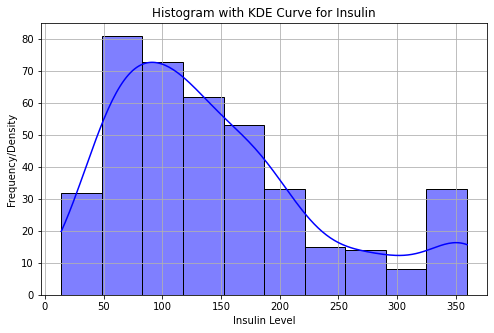

In [227]:
plt.figure(figsize=(8, 5))  # Set the figure size

# Plot the histogram with KDE curve
sns.histplot(df['Insulin'], bins=10, color='blue', kde=True)

# Add labels and a title
plt.xlabel('Insulin Level')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Curve for Insulin')

plt.grid(True)
plt.show()

In [228]:
# (e) Transforming Insulin column using loge (x+1) formula to make the Insulin values follow the normal distribution 
df_before_insulin_transform = df.copy()

df['Insulin'] = np.log1p(df['Insulin'])  # np.log1p applies log(x + 1)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


In [229]:
# (f) finding the kurtosis and skewness values of the Insulin attribute
kurtosis = df["Insulin"].kurtosis()
skewness = df['Insulin'].skew()

print("The kurtosis for Insulin is", kurtosis)
print("The skewness for Insulin is", skewness)

The kurtosis for Insulin is 0.04668578356986641
The skewness for Insulin is -0.39424325557435635


In [230]:
# (g) Use a QQ-plot to compare before and after the loge(x+1) transformation for Insulin column.


(h) Detect  and  correct  outliers  in  the  'Glucose','BloodPressure'  and  'SkinThickness' columns

### Glucose:

In [232]:
q1 = df["Glucose"].quantile(0.25)
q3 = df["Glucose"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 99.0
Q3: 143.0
Interquartile Range: 44.0


In [233]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: 33.0
Upper bound: 209.0


In [234]:
outliers = df.loc[(df['Glucose'] < lower) | (df['Glucose'] > upper)]
print("Dataframe of outliers:")
outliers.head()

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
182,1,0,74.0,20,3.178054,27.7,0.299,21,0


In [235]:
df.loc[df["Glucose"] < lower, "Glucose"] = lower
df.loc[df["Glucose"] > upper, "Glucose"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


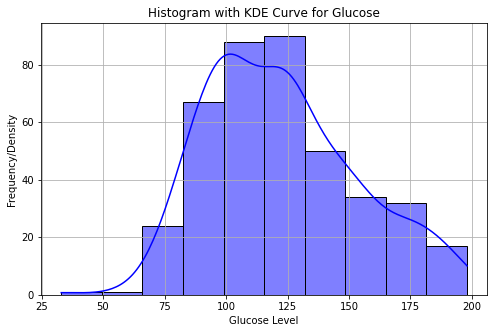

In [236]:
plt.figure(figsize=(8, 5))  # Set the figure size

# Plot the histogram with KDE curve
sns.histplot(df['Glucose'], bins=10, color='blue', kde=True)

# Add labels and a title
plt.xlabel('Glucose Level')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Curve for Glucose')

plt.grid(True)
plt.show()

### BloodPressure:

In [237]:
q1 = df["BloodPressure"].quantile(0.25)
q3 = df["BloodPressure"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 62.0
Q3: 78.0
Interquartile Range: 16.0


In [238]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: 38.0
Upper bound: 102.0


In [239]:
outliers = df.loc[(df['BloodPressure'] < lower) | (df['BloodPressure'] > upper)]
print("Dataframe of outliers:")
outliers.head()

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30.0,38,4.430817,43.3,0.183,33,0
43,9,171,110.0,24,5.484797,45.4,0.721,54,1
125,1,88,30.0,42,4.605170,55.0,0.496,26,1
177,0,129,110.0,46,4.875197,67.1,0.319,26,1
597,1,89,24.0,19,3.258097,27.8,0.559,21,0


In [240]:
df.loc[df["BloodPressure"] < lower, "BloodPressure"] = lower
df.loc[df["BloodPressure"] > upper, "BloodPressure"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


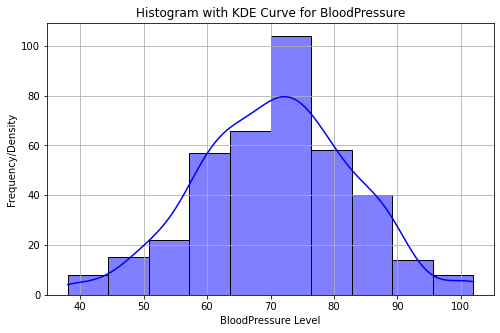

In [241]:
plt.figure(figsize=(8, 5))  # Set the figure size

# Plot the histogram with KDE curve
sns.histplot(df['BloodPressure'], bins=10, color='blue', kde=True)

# Add labels and a title
plt.xlabel('BloodPressure Level')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Curve for BloodPressure')

plt.grid(True)
plt.show()

### SkinThickness:

In [242]:
q1 = df["SkinThickness"].quantile(0.25)
q3 = df["SkinThickness"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 21.0
Q3: 37.0
Interquartile Range: 16.0


In [243]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: -3.0
Upper bound: 61.0


In [244]:
outliers = df.loc[(df['SkinThickness'] < lower) | (df['SkinThickness'] > upper)]
print("Dataframe of outliers:")
outliers.head()

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78.0,63,2.70805,59.4,2.42,25,1


In [245]:
df.loc[df["SkinThickness"] < lower, "SkinThickness"] = lower
df.loc[df["SkinThickness"] > upper, "SkinThickness"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


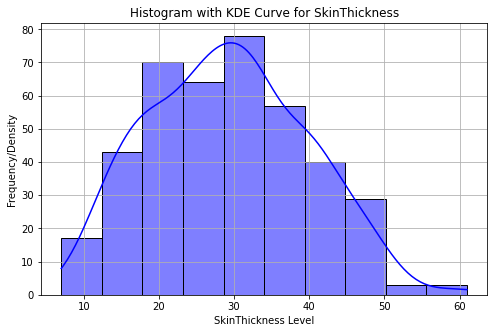

In [246]:
plt.figure(figsize=(8, 5))  # Set the figure size

# Plot the histogram with KDE curve
sns.histplot(df['SkinThickness'], bins=10, color='blue', kde=True)

# Add labels and a title
plt.xlabel('SkinThickness Level')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Curve for SkinThickness')

plt.grid(True)
plt.show()

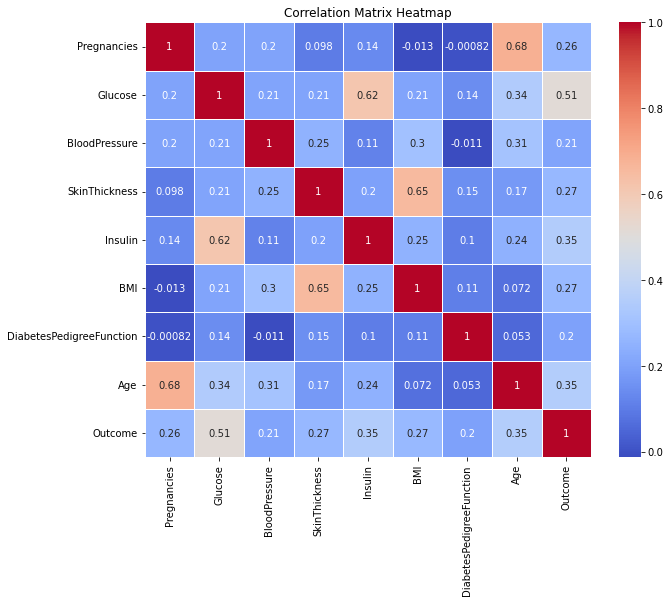

In [248]:
# (i) Displaying the correlation matrix using the seaborn heatmap function between continuous variables; Pregnancies, Glocose, BloodPressure, SkinThickness, Insulin, BMI, Age.
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()